## TidyTuesday data for [2025-05-13](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-05-13/readme.md)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vesuvius = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-13/vesuvius.csv')

In [3]:
vesuvius

event_id                  time   latitude  longitude  depth_km  \
0          4251  2011-04-20T00:27:24Z  40.818000  14.430000      0.42   
1          4252  2012-06-19T21:29:48Z  40.808833  14.427167      1.31   
2         22547  2013-01-01T07:34:46Z  40.822170  14.428000      0.06   
3         22546  2013-01-03T16:06:48Z        NaN        NaN       NaN   
4         22545  2013-01-03T16:07:37Z        NaN        NaN       NaN   
...         ...                   ...        ...        ...       ...   
12022     40738  2024-12-29T23:56:51Z  40.823000  14.428333      0.34   
12023     40741  2024-12-30T07:52:43Z  40.823333  14.423500      0.56   
12024     40743  2024-12-30T12:52:24Z        NaN        NaN       NaN   
12025     40744  2024-12-30T15:11:28Z  40.819000  14.424500      0.55   
12026     40802  2024-12-31T17:02:32Z  40.822000  14.409833      0.41   

       duration_magnitude_md  md_error            area        type  \
0                        1.2       0.3  Mount Vesuvius  earthquake   
1                        0.7       0.3  Mount Vesuvius  earthquake   
2                        2.2       0.3  Mount Vesuvius  earthquake   
3                        0.2       0.3  Mount Vesuvius  earthquake   
4                        0.2       0.3  Mount Vesuvius  earthquake   
...                      ...       ...             ...         ...   
12022                   -0.1       0.3  Mount Vesuvius  earthquake   
12023                   -0.1       0.3  Mount Vesuvius  earthquake   
12024                   -0.1       0.3  Mount Vesuvius  earthquake   
12025                   -0.4       0.3  Mount Vesuvius  earthquake   
12026                    0.0       0.3  Mount Vesuvius  earthquake   

      review_level  year  
0          revised  2011  
1          revised  2012  
2      preliminary  2013  
3      preliminary  2013  
4      preliminary  2013  
...            ...   ...  
12022  preliminary  2024  
12023  preliminary  2024  
12024  preliminary  2024  
12025  preliminary  2024  
12026  preliminary  2024  

[12027 rows x 11 columns]

<Axes: xlabel='depth_km', ylabel='Count'>

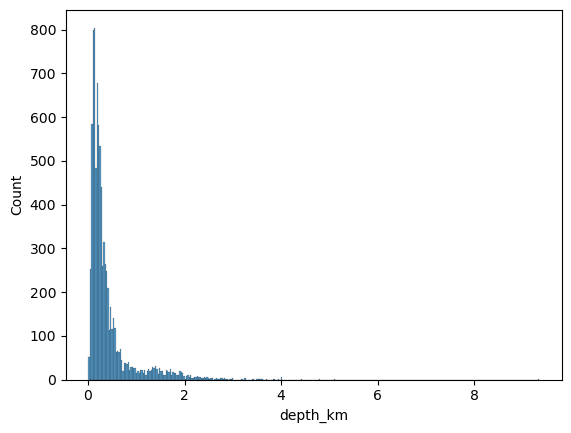

In [8]:
sns.histplot(data=vesuvius,x="depth_km")

In [4]:
vesuvius["time"] = pd.to_datetime(vesuvius["time"])

In [5]:
vesuvius["hour"] = vesuvius["time"].dt.hour
time_bins = [0, 5, 12, 17, 21, 24]  # 0-4 -> Night, 5-11 -> Morning, etc.
time_labels = ["Night", "Morning", "Afternoon", "Evening", "Night"]


In [6]:
vesuvius["time_of_day"] = pd.cut(vesuvius['hour'], bins=time_bins, labels=time_labels, right=False, ordered=False)


In [7]:
vesuvius["time_of_day"]

0            Night
1            Night
2          Morning
3        Afternoon
4        Afternoon
           ...    
12022        Night
12023      Morning
12024    Afternoon
12025    Afternoon
12026      Evening
Name: time_of_day, Length: 12027, dtype: category
Categories (4, object): ['Afternoon', 'Evening', 'Morning', 'Night']

In [8]:
vesuvius["year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024], dtype=int64)

In [9]:
bin_edges = [-float('inf'), 1, 2, 3, 5, 7, float('inf')]
vesuvius["depth_bins"] = pd.cut(vesuvius['depth_km'], bins=bin_edges)

In [10]:
vesuvius["depth_bins"].value_counts()

depth_bins
(-inf, 1.0]    7777
(1.0, 2.0]      648
(2.0, 3.0]      142
(3.0, 5.0]       25
(5.0, 7.0]        1
(7.0, inf]        1
Name: count, dtype: int64

In [11]:
vesuvius.head()

event_id                      time   latitude  longitude  depth_km  \
0      4251 2011-04-20 00:27:24+00:00  40.818000  14.430000      0.42   
1      4252 2012-06-19 21:29:48+00:00  40.808833  14.427167      1.31   
2     22547 2013-01-01 07:34:46+00:00  40.822170  14.428000      0.06   
3     22546 2013-01-03 16:06:48+00:00        NaN        NaN       NaN   
4     22545 2013-01-03 16:07:37+00:00        NaN        NaN       NaN   

   duration_magnitude_md  md_error            area        type review_level  \
0                    1.2       0.3  Mount Vesuvius  earthquake      revised   
1                    0.7       0.3  Mount Vesuvius  earthquake      revised   
2                    2.2       0.3  Mount Vesuvius  earthquake  preliminary   
3                    0.2       0.3  Mount Vesuvius  earthquake  preliminary   
4                    0.2       0.3  Mount Vesuvius  earthquake  preliminary   

   year  hour time_of_day   depth_bins  
0  2011     0       Night  (-inf, 1.0]  
1  2012    21       Night   (1.0, 2.0]  
2  2013     7     Morning  (-inf, 1.0]  
3  2013    16   Afternoon          NaN  
4  2013    16   Afternoon          NaN

## Annual number of tremors vs duration

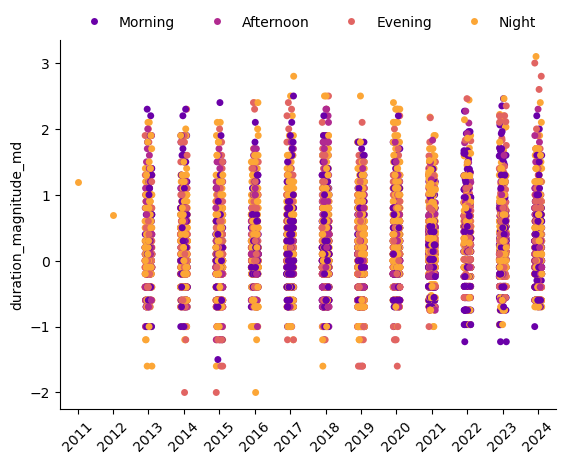

In [315]:
fig, ax = plt.subplots()
hue_order = ["Morning", "Afternoon", "Evening", "Night"]
color_map = ["lightblue", "dodgerblue", "lightgrey", "grey"]
colors = {x: color_map[ind] for ind, x in enumerate(hue_order)}
     
sns.stripplot(data=vesuvius, x="year", y="duration_magnitude_md", \
              hue='time_of_day', hue_order=hue_order, palette="plasma")
plt.xticks(rotation=45)
plt.xlabel("")

plt.legend(
    title='',
    loc='upper center',     
    bbox_to_anchor=(0.5, 1.1), 
    ncol=4,
    frameon=False
)
sns.despine()

## Earthquakes at different times of the day

In [12]:
vesuvius["hour12"] = vesuvius["time"].dt.strftime("%I").astype(int)    
vesuvius["AMPM"] = vesuvius["time"].dt.strftime("%p")              

In [13]:
vesuvius_grp = vesuvius.groupby(["hour12", "AMPM"]).size().unstack(fill_value=0)
vesuvius_grp

AMPM     AM   PM
hour12          
1       691  339
2       694  384
3       618  335
4       591  440
5       510  732
6       472  555
7       352  610
8       287  592
9       284  624
10      380  598
11      334  627
12      646  332

<Axes: xlabel='hour12'>

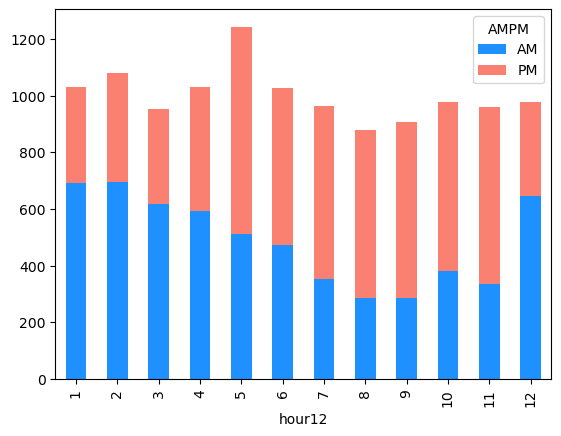

In [14]:
vesuvius_grp.plot(kind="bar", stacked=True, color=['dodgerblue', 'salmon'])

## Polar coordinates

In [171]:
import plotly.graph_objects as go
import roman

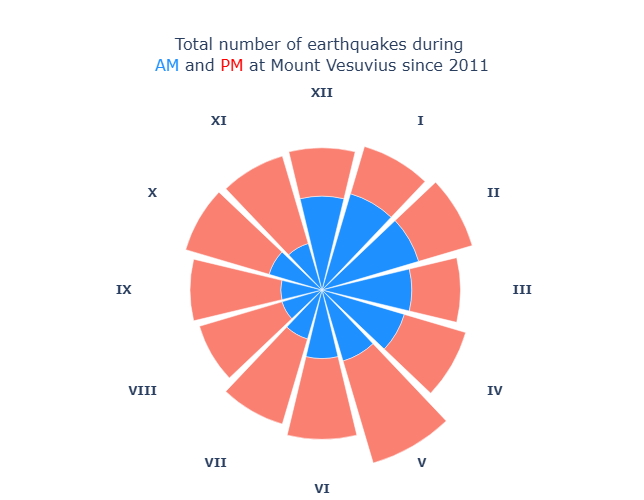

In [289]:
vesuvius_grp['angle'] = vesuvius_grp.index * 30

# Create polar plot with two bar traces: AM and PM
fig = go.Figure()

# AM bars
fig.add_trace(go.Barpolar(
    r=vesuvius_grp['AM'],
    theta=vesuvius_grp['angle'],
    name='AM',
    marker_color='dodgerblue',
    hovertemplate='count = %{r}<br>time = %{theta} AM<extra></extra>'
))

# PM bars
fig.add_trace(go.Barpolar(
    r=vesuvius_grp['PM'],
    theta=vesuvius_grp['angle'],
    name='PM',
    marker_color='salmon',
    hovertemplate='count = %{r}<br>time = %{theta} PM<extra></extra>'
))

# Layout
fig.update_layout(
    title={
        'text': 'Total number of earthquakes during <br><span style="color:dodgerblue;">AM</span> and <span style="color:red;">PM</span> at Mount Vesuvius since 2011',
        'font': {
            'size': 16  
        },
        "x" : 0.5,
    },
    polar=dict(
        angularaxis=dict(direction='clockwise', rotation=90, tickmode='array',
                         tickvals=np.arange(30, 361, 30),
                         ticktext=[f"<b>{roman.toRoman(h)}</b>" for h in range(1, 13)], 
                         showline=False, showgrid=False),
        radialaxis=dict(showticklabels=False, ticks='', showline=False, showgrid=False)
    ),
    showlegend=False,
    template='plotly_white',
    width=500,
    height=500,
    margin=dict(l=0, r=0, t=100, b=20)
)
#fig.write_image("Vesuvius.png")
fig.show()

There is no direct way to add labels to bars in radial axis. As a workaround, add scatterplot and show only text.

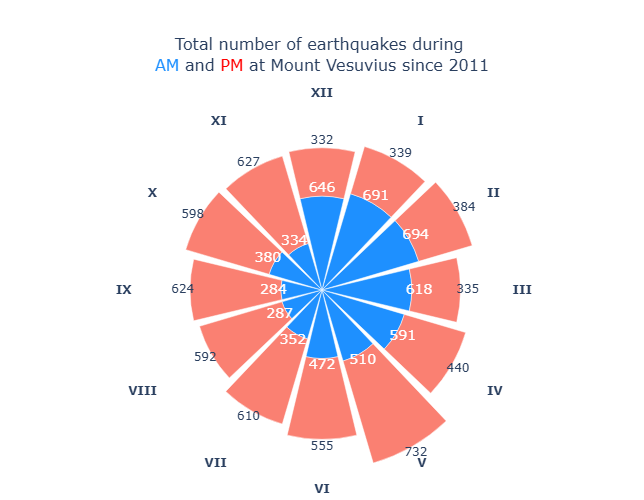

In [293]:
vesuvius_grp['angle'] = vesuvius_grp.index * 30

# Create polar plot with two bar traces: AM and PM
fig = go.Figure()

# AM bars
fig.add_trace(go.Barpolar(
    r=vesuvius_grp['AM'],
    theta=vesuvius_grp['angle'],
    name='AM',
    marker_color='dodgerblue',
    hovertemplate='count = %{r}<br>time = %{theta} AM<extra></extra>'
))

# PM bars
fig.add_trace(go.Barpolar(
    r=vesuvius_grp['PM'],
    theta=vesuvius_grp['angle'],
    name='PM',
    marker_color='salmon',
    hovertemplate='count = %{r}<br>time = %{theta} PM<extra></extra>'
))

# Layout
fig.update_layout(
    title={
        'text': 'Total number of earthquakes during <br><span style="color:dodgerblue;">AM</span> and <span style="color:red;">PM</span> at Mount Vesuvius since 2011',
        'font': {
            'size': 16  
        },
        "x" : 0.5,
    },
    polar=dict(
        angularaxis=dict(direction='clockwise', rotation=90, tickmode='array',
                         tickvals=np.arange(30, 361, 30),
                         ticktext=[f"<b>{roman.toRoman(h)}</b>" for h in range(1, 13)], 
                         showline=False, showgrid=False),
        radialaxis=dict(showticklabels=False, ticks='', showline=False, showgrid=False)
    ),
    showlegend=False,
    template='plotly_white',
    width=500,
    height=500,
    margin=dict(l=0, r=0, t=100, b=20)
)
fig.add_trace(go.Scatterpolar(
    r=vesuvius_grp['AM']+50,  
    theta=vesuvius_grp['angle'],  
    mode="text",  
    text=vesuvius_grp['AM'],  
    textposition="middle center",  
    textfont=dict(size=14, color="white"),
    name="AM Labels",
    hoverinfo="skip",  
    showlegend=False
))

fig.add_trace(go.Scatterpolar(
    r=vesuvius_grp['AM']+vesuvius_grp['PM']+50,  
    theta=vesuvius_grp['angle'],  
    mode="text",
    text=vesuvius_grp['PM'],
    textposition="middle center",
    name="PM Labels",
    hoverinfo="skip",
    showlegend=False
))
#fig.write_image("Vesuvius_labels.png")
fig.show()